<a href="https://colab.research.google.com/github/raketic-ognjen/CAPM-Model-Lesson5/blob/main/CapitalAssetPricingModel_(CAPM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='tomato' style="font-size:40px"><center><b>05. Capital Asset Pricing Model (CAPM)</b></center></font>

This is an intro to one of the most frequently used model in finance - Capital Asset Pricing Model or CAPM.This model, with all its oversimplicity, is the foundation for pricing equity (and creating and understanding analyst reports), company valuation etc.

CAPM provides an alternative way to calculate expected returns on assets, with respect to the sample mean that we have employed thus far.

## <font color='orange' style="font-size:25px"><b>Installing and updating packages</b></font>

As usual, before we start, please update <font color='mediumseagreen'><b>Plotly - Graph Object</b></font> (only Google Colab users):

In [1]:
%pip install plotly -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 31.7 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


In this lecture we are going to use following packages:
* <font color='mediumseagreen'><b>Plotly - Graph Object</b></font>
* <font color='mediumseagreen'><b>NumPy</b></font>
* <font color='mediumseagreen'><b>Pandas</b></font>
* <font color='mediumseagreen'><b>Pandas' DataReader</b></font>
* <font color='mediumseagreen'><b>SciPy - Optimize</b></font>
* function <font color='DodgerBlue'><b>make_subplots</b></font> from <font color='mediumseagreen'><b>Plotly - Subplots</b></font>
* <font color='mediumseagreen'><b>StatsModels</b></font> - library which has variety of statistical models, test and indicators
* Our small package for investment lectures - <font color='DarkTurquoise'><b>qt</b></font>. Before we import it, we need to upload it, of course (again Google Colab users only):

In [2]:
import plotly.graph_objects as go
import numpy as np
import numpy.linalg as LA
import pandas as pd
import pandas_datareader as pdr
from plotly.subplots import make_subplots
import scipy.optimize as sco
import statsmodels.api as sm
import kvantitativne_formule as qt

In this lecture we talk about the idealized CAPM world, one of the benchmark models in finance. I have heavily relied here on **Bodie, Kane and Markus, Chapter 9 (especially 9.1).**

CAPM is the model used to figure out cost of capital in corporations, discount rate when pricing company stocks and much, much more.

It is also used to estimate in a different way expected returns when investors perform portfolio optimization.

## <font color='orange' style="font-size:25px"><b>Capital Market Line (CML)</b></font>

In the previous lecture we studied the **efficient frontier** when we have a multiple risky assets and a risk-free asset and showed that it is **a straight line**. On that line, only the tangency portfolio consisting solely of risky assets is efficient.

Suppose now that the following conditions hold (they are, obviously, highly simplifying).


1. There are many investors, each with wealth small compared
to the total wealth of all investors. Investors are price-takers, ie. they act as
though security prices are unaffected by their own trades **(price-taking assumption)**.

2. All investors have the same investment period and ignore everything that might happen after the end of that period.



3. Investments are limited to a universe of publicly traded financial assets, such
as stocks and bonds, and to risk-free borrowing or lending. This
rules out investment in nontraded assets such as education (human
capital), private companies, and governmentally funded assets such as town halls
and international airports. **All investors may borrow or lend any
amount at the same risk-free rate.**


4. No taxes or transaction costs exist.


5. All investors are mean-variance optimizers, i.e. they all use the Markowitz portfolio selection model.

6. All investors analyze securities **in the same way** and share the same economic view of the world. The result are **identical estimates of the probability distribution of future cash flows** from investing in the available securities; that is, for any set of security prices, they **all derive the same input list** to feed into the Markowitz
model. (same expected returns and covariance matrix).

All investors use the same expected returns and covariance matrix of security returns to generate the efficient frontier and the unique optimal risky portfolio. This assumption is often referred to as **homogeneous expectations or beliefs**.

In that case **all investors invest in a combination of a market portfolio and the risk free rate**, i.e. market portfolio is the tangency portfolio in the CAPM world.

Efficient portfolios then all lie on the straight line in the ($\sigma_p$, $\mu_p$) plane. This line consists in a fraction of money invested in risk-free asset and the remainder into the market portfolio. This line is called the **Capital Market Line**.

Under the above conditions, no investment portfolio can be above that line, those on the line are efficient, and below the line are inefficient and can be substituted by a combination on the line.

Denote the risk-free rate by $r_f$ and the market portfolio return by $r_m$. Suppose, further, that the fraction of money invested in the market portfolio is $\alpha$ so that the fraction $1-\alpha$ is invested into the riskless fund.

The expected return on such portfolio is:

\begin{align*}
\mu_p & = \mathbb{E}(r_p)=(1-\alpha)r_f+\alpha \mathbb{E}(r_m) \\
& = r_f + \alpha \, (\mathbb{E}(r_m) - r_f)
\end{align*}

The expected return on any efficient portfolio in this case is equal to the risk-free rate to which we add a risk premium. Risk premium is proportional to the market risk premium $\mathbb{E}(r_m) - r_f$ multiplied by the fraction of our money invested into the market portfolio.

By our previous assumptions, all investors assess market risk premium and the risk-free rate in an identical way. They only differ in how much risk they are willing to take, i.e. only differ by selecting different $\alpha$.

Variance of such portfolio is (variance and covariance of a risk-less return are zero):

$$\sigma_p^2 =\mathbb{V}(r_p)=\alpha^2\mathbb{V}(r_m)+(1-\alpha)^2\mathbb{V}(r_f)+2\,\alpha(1-\alpha)\,\mathbb{Cov}(r_f,\,r_m)=\alpha^2\, \sigma_m^2$$

from which follows that volatility of this portfolio is:

$$\sigma_p=\alpha\, \sigma_m \,\,\, ⇒ \alpha = \sigma_p/\sigma_m$$

Combining the expression for volatility and the expected return, we find that:

$$\mathbb{E}(r_p) = \mu_p =r_f + \sigma_p \, \frac{\mathbb{E}(r_m) - r_f}{\sigma_m}$$



Note that this is a straight line in the $(\sigma_p,\mu_p)$ space. Its intercept is the risk-free rate and its slope is the Sharpe ratio of the market portfolio.

Note that in this world (we call it the idealized or CAPM world) Sharpe ratio of ANY optimal portfolio is equal to the Sharpe ratio of the market portfolio $\frac{\mathbb{E}(r_m) - r_f}{\sigma_m}$. Namely

$$\mathbb{E}(r_p)- r_f=\sigma_p \, \frac{\mathbb{E}(r_m) - r_f}{\sigma_m}$$ or, dividing both sides by $\sigma_p$, we obtain

$$ \frac{\mathbb{E}(r_p) - r_f}{\sigma_p}  = \frac{\mathbb{E}(r_m) - r_f}{\sigma_m}$$

> Suppose that the expected return on the market is 14 percent, the risk free rate is 5 percent and the standard deviation of the market portfolio is 20 percent per annum. Find market risk premium and the Sharpe ratio of an efficient portfolio.

In [3]:
mu_mkt = 0.14
r_f = 0.05
sigma_mkt = 0.2

mu_mkt-r_f, (mu_mkt - r_f)/sigma_mkt #parket risk premium and the Sharpe Ratio

(0.09000000000000001, 0.45)

> Find the expected return of the efficient portfolio corresponding to the risk of 30 percent per annum. It is given by

In [4]:
sigma_p = 0.3

mu_p = r_f +(sigma_p/sigma_mkt)*(mu_mkt-r_f)
mu_p

0.185

> Suppose we have an investment that has the risk of 30 percent and the expected return of 16 percent. It would be inefficient. We should sell it and replace it with an investment on the CML line. How should we invest in this case to keep the same level of risk but get the highest possible expected return?

The fraction that should be invested into the market portfolio is given by $\alpha = \sigma_p/\sigma_m$. Thus, in our case, we would need to invest into that portfolio

In [5]:
alpha = sigma_p/sigma_mkt
alpha

1.4999999999999998

We would need to borrow risklessly at 5 percent and put 150 percent of our  money into the market portfolio. This is roughly what the Swedish state pension fund is doing. We now plot the CML line.

In [6]:
sigma_p = np.array([0.0,0.2,0.3,0.4,0.5])
fig=go.Figure()
fig.add_trace(
    go.Scatter(
        x=sigma_p,
        y=0.05+0.45*sigma_p,
        mode='markers+lines',
        line_color ='Crimson',
        marker_color = 'Yellow'
    )
)

fig.update_layout(xaxis=dict(
                  title_text=r'$\sigma_p$'),
                  yaxis=dict(
                  title_text=r'$\mu_p$'),
                  title=dict(
                  text='Capital Market Line',
                  x=0.5,
                  y=0.87,
                  font=dict(
                  size=30,
                  color='Green'
                  )
                  )
)

fig.show()

Within the CAPM world, no portfolio can be constructed that would lie ABOVE the CML line. The best we can do is to invest on that line, i.e. to invest in a combination of the market portfolio and the risk-free rate.

### <font color='MediumVioletRed' style="font-size:20px"><b>More on the market portfolio</b></font>

In the CAPM world, all investors will choose to hold a portfolio of risky assets in proportions that
duplicate representation of the assets in the market portfolio ( M ), which includes
all traded assets. For simplicity, we refer to all risky assets as stocks.


What is the market portfolio? When we sum over, or aggregate, the portfolios of all
individual investors, lending and borrowing will cancel out (because each lender has a
corresponding borrower), and **the value of the aggregate risky portfolio will equal the
entire wealth of the economy**. This is the market portfolio, M.

The **proportion of each
stock in this portfolio equals the market value of the stock (price per share times the number
of shares outstanding) divided by the sum of the market values of all stocks.**

CML implies that as individuals attempt to optimize their personal portfolios, they
each arrive at the same portfolio, with weights on each asset equal to those of the market
portfolio.

Given the assumptions of the previous section, it is easy to see that all investors
will desire to hold **identical risky portfolios**. If all investors use identical Markowitz
analysis (Assumption 5) applied to the same universe of securities (Assumption 3) for
the same time horizon (Assumption 2) and use the same input list (Assumption 6), they
all must arrive at the same composition of the optimal risky portfolio, the portfolio on
the efficient frontier identified by the tangency line from T-bills to that frontier.

This implies that if the weight of GE stock, e.g, in each common
risky portfolio is 1%, then GE also will comprise 1% of the market portfolio. The same
principle applies to the proportion of any stock in each investor’s risky portfolio.

Suppose the optimal portfolio of our investors does not include the stock of some
company, such as Delta Airlines.

When all investors avoid Delta stock, the demand is zero and Delta’s price takes a free fall. As Delta stock gets
progressively cheaper, it becomes ever more attractive
and other stocks look relatively less attractive.

Ultimately, Delta reaches a price where it is attractive
enough to include in the optimal stock portfolio.

**Such a price adjustment process guarantees that
all stocks will be included in the optimal portfolio, i.e. in the market portfolio.**

The weight of each stock in the market portfolio is determined based on

$$\alpha_i = \frac{n_i P_i}{n_1 P_1 + n_2 P_2 + \cdots + n_J P_J}$$

where $n_i$ is the number of shares outstanding on the market, $P_i$ is price per share, and $J$ is the number of stocks on the market.

Stated in another way, the weight of stock $i$ is the market capitalization or market cap of stock $i$ relative to the market as a whole. Return on the market can be expressed through returns on individual stocks as follows

$$r_m = \sum_{i=1}^J\alpha_i r_i$$

where $\alpha_i$ are precisely the weights of the stock in the market portfolio, not just any weights. Index SP500 and many other indices (value-weighted indices) are constructed using this way using 500 US stocks with the largest market cap.

### <font color='MediumVioletRed' style="font-size:20px"><b>In the CAPM world passive investment is efficient</b></font>

The market portfolio held by all investors is based on the common input
list, thereby incorporating all relevant information about the universe of securities.

This
means that **investors can skip the trouble of doing security analysis** and obtain an efficient
portfolio simply by holding the market portfolio.

Of course, if everyone were to follow
this strategy, no one would perform security analysis and this result would no longer hold. (See **Chapter 11 of Bodie, Kane, Markus**)

Assuming that
all investors choose to hold a market index mutual fund (say, a fund mimicking SP500), we can separate portfolio selection
into two component.

One is a technical problem - creation of mutual funds by professional
managers. The other is a personal problem that depends on an investor’s risk aversion, allocation
of the complete portfolio between the mutual fund and risk-free assets.

In reality, different investment managers do create risky portfolios that differ from the
market index. We attribute this in part to the use of different input lists in the formation
of the optimal risky portfolio. Nevertheless, the practical significance of the mutual fund
theorem is that a passive investor may view the
market index as a reasonable first approximation to
an efficient risky portfolio.

## <font color='orange' style="font-size:25px"><b>The CAPM: Equilibrium expected returns on individual securities</b></font>

**Capital Asset Pricing Model** or CAPM is one of the most frequently used (and abused) models in finance. It provides a relationship between the excess return on a individual investment asset and the excess return on the market.

The CAPM is built on the insight that the appropriate **risk premium on an asset will be
determined by its contribution to the risk of investors’ overall portfolios**.

Portfolio risk is
what matters to investors and is what governs the risk premiums they demand.

All investors use the same input list, that is, the same estimates of
expected returns, variances, and covariances. (The above assumptions 1 to 6 hold).

Covariances
can be arranged in a covariance matrix, so that the entry in the fifth row and third column,
for example, would be the covariance between the rates of return on the fifth and third
securities.

Each diagonal entry of the matrix is the covariance of one security’s return with
itself, which is simply the variance of that security.

Suppose, for example, that we want to gauge the portfolio risk contribution of GE stock. We measure
it by its covariance
with the market portfolio. To see why this is so, let us look again at the way the variance of
the market portfolio is calculated.

Recall that we calculate the variance of the portfolio by summing over all the elements
of the covariance matrix, first multiplying each element by the portfolio weights from the
row and the column. The contribution of one stock to portfolio variance therefore can be
expressed as the sum of all the covariance terms in the column corresponding to the stock, where each covariance is first multiplied by both the stock’s weight from its row and the
weight from its column.

\begin{align*}
\sigma_m^2&\equiv \mathbb{V}(r_{p,\,1})=\sum_{j,i=1}^J \alpha_j \, \sigma_{j,i} \,\alpha_i  \\
\end{align*}

Suppose we want to highlight contribution of one stock, say, GE. Suppose, further, that GE was listed as the 3rd stock in the list of stocks on the market. Its contribution would be equal to

$$\text{Risk contribution of stock 3 (GE)} = \alpha_3 \sum_{i=1}^J \, \sigma_{3,i} \,\alpha_i$$

Now notice that

$$\mathbb{Cov}(r_3,r_m) =  \mathbb{Cov}(r_3,\sum_{i=1}^J\alpha_i r_i) = \sum_{i=1}^J\mathbb{Cov}(r_3,r_i)\alpha_i  = \sum_{i=1}^J\sigma_{3,i}\alpha_i$$

Thus we obtain that the risk contribution to the total market risk of the stock 3 is given by

$$\text{Risk contribution of stock 3 (GE)} = \alpha_3 \mathbb{Cov}(r_3,r_m)$$

and, more generally, risk contribution of stock $i$ is

$$\text{Risk contribution of stock i} = \alpha_i \mathbb{Cov}(r_i,r_m)$$

This should not surprise us. For example, if the covariance between GE and the rest
of the market is negative, then GE makes a “negative contribution” to portfolio risk: By
providing returns that move in opposition with the rest of the market, GE stabilizes the return
on the overall portfolio.

If the covariance is positive, GE makes a positive contribution to
overall portfolio risk because its returns reinforce swings in the rest of the portfolio.

Note that the market risk premium is equal to:

$$\mathbb{E}(r_m) - r_f = \mathbb{E}(\sum_{i=1}^J\alpha_i r_i) - r_f$$

This can be rewritten as (taking into the account that $\sum_{i=1}^J\alpha_i = 1$) as follows

$$\mathbb{E}(r_m) - r_f = \sum_{i=1}^J \alpha_i (\mathbb{E}( r_i) - r_f)$$.

Therefore, GE's contribution to the market risk premium would be equal to $\alpha_{3} (\mathbb{E}(r_3) - r_f)$. As a result, rewards-to-risk contribution of the GE stock would be equal to

$$\frac{\alpha_{3} (\mathbb{E}(r_3) - r_f)}{\alpha_3 \mathbb{Cov}(r_3,r_m)}= \frac{\mathbb{E}(r_3) - r_f}{\mathbb{Cov}(r_3,r_m)}$$


On the other hand, the reward-to-risk on the market portfolio is equal to

$$\frac{\mathbb{E}(r_m) - r_f}{\mathbb{Cov}(r_m,r_m)} = \frac{\mathbb{E}(r_m) - r_f}{\sigma_m^2}$$

This quantifies the
extra return that investors demand to bear portfolio risk. Notice that for components of the
efficient portfolio, such as shares of GE, we measure risk as the contribution to portfolio
variance (which depends on its covariance with the market). In contrast, for the efficient
portfolio itself, its variance is the appropriate measure of risk.

Before we go on, we can ask **why did we use here square of volatility, i.e. variance and not the Sharpe ratio as above (i.e. volatility without the square)?**

Note that because the appropriate risk measure of GE is its
covariance with the market portfolio (its contribution to the variance of the market portfolio), this risk is measured
in percent squared.

So, dimensionally, we need to use variance instead of standard deviation of market return when measuring here reward to risk ratio.

A basic principle of equilibrium is that all investments should offer the same reward-to-risk
ratio. If the ratio were better for one investment than another, investors would rearrange
their portfolios, tilting toward the alternative with the better trade-off and shying away
from the other.

Such activity would impart pressure on security prices until the ratios were
equalized. Therefore we conclude that the reward-to-risk ratios of GE and the market portfolio
should be equal:

$$\frac{\mathbb{E}(r_i) - r_f}{\mathbb{Cov}(r_i,r_m)} = \frac{\mathbb{E}(r_m) - r_f}{\sigma_m^2}$$

In equilibrium, this should be true for any stock $i$. Thus, we obtain that:

$$\mathbb{E}(r_i) - r_f = \frac{\mathbb{Cov}(r_i,r_m)}{\sigma_m^2}(\mathbb{E}(r_m) - r_f) \equiv \beta_i \,(\mathbb{E}(r_m) - r_f)$$

From the last expression follows that in equilibrium (under the assumptions of the CAPM world) expected return on individual security should be equal to

$$\mathbb{E}(r_i) = r_f +\beta_i \,(\mathbb{E}(r_m) - r_f)$$

This expected return–beta relationship is the most familiar expression of the CAPM to
practitioners. Risk premium on each asset, for each investor, is determine by two things only: market risk premium and the asset beta. Beta measures co-movement between the asset and the market.

To calculate the equilibrium expected return we need to just add the benchmark risk free rate to the appropriate risk premium.

We see now why the assumptions that made individuals act similarly are so useful. If
everyone holds an identical risky portfolio, then everyone will find that the beta of each
asset with the market portfolio equals the asset’s beta with his or her own risky portfolio.
Hence everyone will agree on the appropriate risk premium for each asset.

Does the fact that few real-life investors actually hold the market portfolio imply that the
CAPM is of no practical importance? Not necessarily. Namely, reasonably
well-diversified portfolios shed firm-specific risk and are left with mostly systematic
or market risk.

Even if one does not hold the precise market portfolio, a well-diversified
portfolio will be so highly correlated with the market that a stock’s beta relative to the
market will still be a useful risk measure.

In that case, investors would hold just a market portfolio (and perhaps a risk free asset). Thus, they would hold perfectly diversified portfolio.

Suppose that we add a little bit of some stock in addition to what already exists in the market portfolio. This should change portfolio risk a little. How much would the relative change of risk be?

If $s$, the fraction invested in the asset $j$ is very small, relative change in risk is:

$$\frac{\mathbb{V} \left(s\,r_j+r_m\right)-\mathbb{V}(r_m)}{\mathbb{V}(r_m)}=\frac{\mathbb{V} (r_m)+s^2\,V(r_j)+2\,s\,\mathbb{Cov}\left(r_m,r_j\right)-\mathbb{V} (r_m)}{\mathbb{V}(r_m)}=\frac{s^2\,\mathbb{V}(r_j)+2\,s\,\mathbb{Cov}\left(r_m,r_j\right)}{\mathbb{V}(r_m)}$$

If we ignore the quadratic term in $s$ (this makes sense if the fraction s is very small) the relative change in risk would be equal to:

$$\frac{\mathbb{V}\left(s r_j+r_m\right)-\mathbb{V}\left(r_m\right)}{\mathbb{V}\left(r_m\right)}=2 s \,\frac{\mathbb{Cov}\left(r_m,r_j\right)}{\mathbb{V}\left(r_m\right)}=2 s \beta _j$$

Thus, incremental relative change in risk of a well-diversified portfolio is proportional to beta.

#### <font color='MediumPurple' style="font-size:16px"><b>Relationship of $\beta$ with correlation between the market and the asset</b></font>

**Beta of an asset** in CAPM is covariance between the market and asset return, normalized by the variance of the market return.

Incremental risk of a well-diversified investor is determined by the beta of that asset. Beta determines how a particular asset co-moves with the market. I.e., it measures sensitivity of the asset towards changes in market conditions. It does not reflect company-specific risk.

If correlation between asset $j$ and market return is $\rho_{j,\,m}$, standard deviation on the market portfolio is $\sigma_m$, and standard deviation on the asset $\sigma_j$, from definition of $\beta_j$:

$$\beta _j=\frac{\mathbb{Cov}\left(r_m,r_j\right)}{\mathbb{V}\left(r_m\right)}=\frac{\sigma _m \,\sigma _j \,\rho _{j, m}}{\sigma _m^2}=\frac{\sigma _j}{\sigma _m}\rho _{j, m}$$

Beta of an asset is proportional to the correlation coefficient between the market and that asset . Correlation is multiplied by the risk of the stock vs the market.

Since correlation can be positive, negative and zero, beta can be both positive and negative. But, due to the second factor (the ratio of volatilities), beta can be both higher or smaller than 1.

> Suppose that  the correlation between return on stock A and the market is 0.3, volatility of the stock is 0.4 and the market is 0.2. Find beta of this stock.

In [7]:
rho_Am = 0.3
sigma_A = 0.4
sigma_m= 0.2
beta_A = rho_Am*(sigma_A/sigma_m)
beta_A

0.6

> For the same stock, calculate the expected return assuming that CAPM is valid, that risk free return is 5 percent, and the expected return on the market is 14 percent per annum.

To calculate the expected return using CAPM we apply

$$\mathbb{E}(r_A) = r_f + \beta_A \,(\mathbb{E}(r_m) - r_f)$$

In [8]:
r_f = 0.05
mu_mkt = 0.14
mu_A = r_f + beta_A*(mu_mkt-r_f)
mu_A

0.10400000000000001

Here are betas for some companies (you can find them in the summary page for each company on Yahoo! Finance (calculated based on 5 years worth of monthly data)



*   IBM: 0.85
*   Microsoft: 0.92
*   Apple: 1.30
*   General Motors: 1.37
*   Tesla:  2.07
* Alphabet: 1.09
* Goldman Sachs: 1.42



#### <font color='MediumPurple' style="font-size:16px"><b>Other important properties of betas</b></font>

Adding an investment with a negative beta would reduce portfolio risk. Stocks with negative beta are practically impossible to find. But, one can find ETFs that are negatively correlated with the market. These ETFs take a short position with respect to the market. Some indices such as VIX have negative correlation with the market.

On the other hand, **beta of the riskless asset should be equal to zero**, while **beta of the market portfolio should be equal to 1** since:

$$\beta _r=\frac{\mathbb{Cov}\left(r_f,r_m\right)}{\mathbb{V}\left(r_m\right)}=0$$

$$\beta _j=\frac{\mathbb{Cov}\left(r_m,r_m\right)}{\mathbb{V}\left(r_m\right)}=\frac{\mathbb{V}(r_m)}{\mathbb{V}(r_m)}=1$$

Finally, beta of a portfolio of stocks should be linear combination of constituent betas. Namely:

$$\beta _p=\frac{\mathbb{Cov}\left(r_m,\,r_p\right)}{\mathbb{V}(r_m)}=\frac{\mathbb{Cov}\left(r_m,\sum_{i=1}^n w_i\,r_i\right)}{\mathbb{V}(r_M)}=\frac{\sum_{i=1}^n w_i\, \mathbb{Cov}\left(r_M, \, r_i\right)}{\mathbb{V}(r_M)}=\sum _{i=1}^n w_i\,\beta _i$$

In a well-functioning market, investors receive
high expected returns only if they are willing to bear risk.
Of course, investors do not directly observe or determine expected returns on securities.

Rather, they observe security prices and bid those prices up or down. Expected rates of
return are determined by the prices investors must pay compared to the cash flows those
investments might garner.

#### <font color='MediumPurple' style="font-size:16px"><b>Security Market Line</b></font>

If you take all of the stocks in existence and compute their betas, you can **plot returns on stocks vs betas**. If CAPM holds, they should all going to be on the **straight line** called <font color="blue">Security Market Line or SML</font>. The slope of the line is simply the risk premium on the market.

In [9]:
beta = np.array([0.0,0.2,0.6,0.8,1.4])
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=beta,
        y=0.05+0.06*beta,
        mode='markers+lines',
        line_color='Red',
        marker_color='Blue'
    )
)
fig.update_layout(
        xaxis=dict(
            title_text=r'\beta_i$',
        ),
        yaxis=dict(
            title_text='Excess return'
        ),
        title=dict(
            text= 'SML: Expected return on stock vs beta',
            x=0.5,
            y=0.87,
            font=dict(
                size=30,
                color='Green'
            )
        )
)

fig.show()

So, according to the CAPM, all of these dots (expected returns on individual stocks) need to be on the straight line as a function of individual stock beta. This is a very bold prediction. Excess return on the asset is nothing more than a multiple of the excess return on the market. This is the simplest factor model.

We can view the expected return–beta relationship as a reward–risk equation. The beta of
a security is the appropriate measure of its risk because beta is proportional to the risk that
the security contributes to the optimal risky portfolio.

The slope of the Security Market Line (SML) is equal to the risk premium on the market portfolio and the intercept is equal to the risk-free rate which corresponds to $\beta =0$.

#### <font color='MediumPurple' style="font-size:16px"><b>SML vs CML</b></font>

**The CML
graphs the risk premiums of efficient portfolios (i.e., portfolios composed of the market
and the risk-free asset) as a function of portfolio standard deviation**.

This is appropriate
because standard deviation is a valid measure of risk for efficiently diversified portfolios
that are candidates for an investor’s overall portfolio.

The SML graphs
**individual asset risk premiums as a function of asset
risk**. The relevant measure of risk for individual
assets held as parts of well-diversified portfolios is
not the asset’s standard deviation or variance; it is,
instead, the contribution of the asset to the portfolio
variance, which we measure by the asset’s beta.

The
SML is valid for both efficient portfolios and individual
assets as long as we are assumed to live in the CAPM world.

The security market line provides a benchmark
for the evaluation of investment performance. Given
the risk of an investment, as measured by its beta, the
SML provides the required rate of return necessary
to compensate investors for risk as well as the time
value of money.

Because the security market line is the graphic
representation of the expected return–beta relationship,
**“fairly priced” assets plot exactly on the
SML**.

Their expected returns are commensurate
with their risk. Given the CAPM assumptions above, all securities must
lie on the SML in market equilibrium.

Nevertheless,
we see here how the CAPM may be of use in the money-management industry. Suppose that the SML relation is used as a benchmark
to assess the fair expected return on a risky asset.

Then security analysis is performed
to calculate the return actually expected. (Notice that we depart here from the simple
CAPM world in that some investors now apply their own unique analysis to derive an
“input list” that may differ from their competitors’.)

If a stock is perceived to be a good
buy, or underpriced, it will provide an expected return in excess of the fair return stipulated
by the SML.

Underpriced stocks therefore plot above the SML: Given their betas,
their expected returns are greater than dictated by the CAPM. Overpriced stocks plot below the SML.

The difference between the fair and actually expected rates of return on a stock is called
the stock’s alpha, denoted by $\alpha$.

> Suppose we consider the same example as above (stock A). We have seen that the equilibrium expected return (or CAPM return) would be 10.4 percent. Suppose our security analysis indicates that the actual expected return is 12 percent. The alpha would be

In [10]:
0.12-0.104

0.016

I.e. 1.6 percents. This stock would in this case be underpriced and we could consider buying it.

#### <font color='MediumPurple' style="font-size:16px"><b>CAPM and stock valuation</b></font>

CAPM is the method of choice in financial analysis to calculate cost of equity of financial assets, especially stocks, i.e. equilibrium discount factor. Assuming the validity of the Gordon growth model (starting next year, dividends grow at costant and known rate $g$), share price is equal to

$$P_0 =\sum_{t=1}^{\infty}\frac{\mathbb{E}(div_t)}{(1+\mathbb{E}(r_s))^t} = \frac{\mathbb{E}(div_1)}{\mathbb{E}(r_s) - g}$$


where in the numerator we have the expected dividend next year, while in the denominator is the difference between the cost of equity (expected return on equity) and expected dividends growth rate.

Note that this formula is using the NPV calculation based on natural, not risk neutral, probabilities and, therefore uses discounting of the expected dividends (future cash flows) using the cost of equity, not just the risk-free rate.

Suppose we know that expected dividend next year is 3 dollars per share and the estimated growth rate is 5 percent per annum. I.e.

In [11]:
div_1 = 3 #expected dividend at year 1
g = 0.05 #dividend growth rate

Suppose that the analysts (or your own analysis) predicts that beta of this firm's equity is 1.3.

Finally, market risk premium (excess return on the market) is 6 percent per annum while the risk-free rate is 2 percent per annum. Find the cost of equity using CAPM and equilibrium (fundamental) value of share for this company.

In [12]:
r_f = 0.02
mkt_risk_premium=0.06
beta=1.3
cost_of_equity = r_f + beta*mkt_risk_premium #Calculating cost of equity using CAPM
cost_of_equity

0.098

i.e. cost of equity should be around 10 percent per annum (this is our estimate of the expected return on stocks using CAPM). Using Gordon growth model for equity valuation we obtain that

In [13]:
P = div_1/(cost_of_equity-g)
P

62.5

In [14]:
g=0.025
P=div_1/(cost_of_equity-g)
P

41.0958904109589

Thus, equilibrium share price is 62.5 USD per share.

#### <font color='Blue' style="font-size:16px"><b>If we have time: Derivation of the Gordon Growth Formula</b></font>

Based on constant growth rate assumption, NPV of a share price is equal to the sum of growth perpetuity which is, in turn, the sum of a geometric progression, provided that the convergence condition is satisfied.

$$P_0 =\sum_{t=1}^{\infty}\frac{\mathbb{E}(div_t)}{(1+\mathbb{E}(r_s))^t} = \frac{\mathbb{E}(div_1)}{\mathbb{E}(r_s) - g}$$

If we assume that each year, starting from year 1, expected dividends growth by the factor of $g$ we would have:

$$\mathbb{E}(div_t) = \mathbb{E}(div_1)(1+g)^{t-1}, \, \, \,t=2,3, \cdots $$


Note that $f \equiv \frac{1+g}{1+E(r_s)} < 1$ provided that the cost of capital is higher than the dividend growth. Mathematically, this assumption ensures the convergence of the series and it leads to:

$$P_0 = \frac{\mathbb{E}(div_1)}{(1+\mathbb{E}(r_s))} \sum_{t=0}^{\infty} \left(\frac{1+g}{1+E(r_s)}\right)^t= \frac{\mathbb{E}(div_1)}{(1+\mathbb{E}(r_s))} \sum_{t=0}^{\infty} f^t $$

Note that the sum of the geometric progression with rate $f<1$ is equal to

$$\sum_{t=0}^{\infty} f^t = \frac{1}{1-f}$$

Substituting the expression for $f$ and simplifying we obtain that:

$$P_0 = \frac{\mathbb{E}(div_1)}{(1+\mathbb{E}(r_s))} \frac{1}{1-f} = \frac{\mathbb{E}(div_1)}{(1+\mathbb{E}(r_s))} \frac{1}{1-\frac{1+g}{1+E(r_s)}} =  \frac{\mathbb{E}(div_1)}{\mathbb{E}(r_s) - g}$$

#### <font color='MediumPurple' style="font-size:16px"><b>CAPM, WACC and company valuation</b></font>

Company valuation can be performed in many different ways. One way is to project cash flows generated by company into the future (in aggregate) and then discount them by something called WACC (weighted average cost of capital). This is a very important concept.

Different securities have different systemic risk exposure and, therefore, different risk premia. Equity is risky and thus equity holders require rather high returns. Bond holders are protected (they get their money before the shareholders). Thus, the cost of debt is typically less (unless debt is risky, when company has overextended itself and borrowed too much).

Furthermore, interest payments are considered as cost of doing business (but dividends are not). Thus, there is a tax advantage of holding debt.

We can think of the firm as a portfolio of assets, each of them with their own expected returns. WACC is the expected return on the portfolio of firm funds.

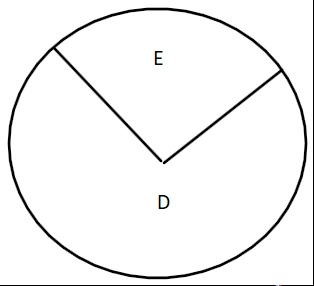

Suppose our company is funded partially with debt and partially with equity. Suppose, further, that beta of debt is $\beta_d$ is smaller than beta of equity $\beta_e$. Fraction of debt $D$ to total asset value is $\alpha = \frac{D}{D+E}$. It tells us what is the fraction of company operations funded by debt (the rest is equity funding).

Corporate debt interest payments are tax deductible, which reduces the effective cost of debt. If corporate tax rate is $\tau$, we obtain

$$WACC = \alpha \,(1 -\tau) \, \mathbb{E}(r_d) + (1-\alpha ) \,\mathbb{E}(r_e)$$



Suppose that

In [15]:
tau = 0.35 #tax rate
alpha = 0.6 #Fraction of company funded by debt
r_f =0.02
beta_d = 0.2
beta_e=1.3
mkt_risk_premium =0.06

Let us calculate first cost of equity and cost of debt

In [16]:
cost_of_equity = r_f + beta_e*mkt_risk_premium
cost_of_debt = r_f + beta_d*mkt_risk_premium
cost_of_equity, cost_of_debt

(0.098, 0.032)

Weighted average cost of capital is, therefore, equal to

In [17]:
WACC = (1-tau)*alpha*cost_of_debt + (1-alpha)*cost_of_equity
WACC

0.051680000000000004

Assuming some values for next year cash flow and annual cash flow growth rate company value would be 3.8 million dollars.

In [18]:
cf_1=3.8
g=0.02
V = cf_1/(WACC-g)
V

119.94949494949495

Thus, it would be around 120 million dollars

#### <font color='MediumPurple' style="font-size:16px"><b>Systematic vs company-specific risk</b></font>

Recall that:

$$\mathbb{E}(r_i) = r_f + \beta_i \mathbb{E}(r_m - r_f)$$

Testing this relationship empirically amounts to performing the following linear regression:

$$r_i - r_f = \beta_i (r_m - r_f) + \varepsilon_i$$

Risk of any stock has the **systematic risk** component (i.e. component related to the co-movement with the market, measured by $\beta_j$) and **specific risk**  component (variance of $\varepsilon_i$).

Namely, taking the variance of both sides of the equation

$$\mathbb{V}(r_i - r_f) = \mathbb{V}(\beta_i (r_m - r_f) + \varepsilon_i)$$

Since $r_f$ is assumed to be riskless,

$$\mathbb{V}(r_i - r_f) =\mathbb{V}(r_i)$$

On the other hand (the error terms are always assumed to be uncorrelated with the regressor)

$$\mathbb{V}(\beta_i (r_m - r_f) + \varepsilon_i) = \beta_i^2 \mathbb{V}(r_m) + \mathbb{V}(\varepsilon_i)$$

Finally, we obtain that

$$\mathbb{V}(r_i) = \beta_i^2 \mathbb{V}(r_m) + \mathbb{V}(\varepsilon_i) =\text{Systematic Risk } + \text{Company Specific Risk}$$

#### <font color='MediumPurple' style="font-size:16px"><b>Using CAPM to determine input (expected returns) for portfolio optimization</b></font>

In Lecture 3 we used sample mean to perform Mean-Variance portfolio optimization. In particular, for the stocks that we have used in that example, we wanted to determine optimal portfolio when the target rate 15% annually. Let us repeat the same procedure here.

First, upload and import the first sheet from "optimization.xlsx". After that compute returns from prices (but before that eliminate risk-free rate since it is already computed).

In [19]:
prices=pd.read_excel('optimization.xlsx',sheet_name='Sheet1',index_col="DATE")
ret=prices.drop('rf',axis=1).pct_change().dropna()
ret.head()

,AMZN,MSFT,IBM,AAPL,^GSPC
DATE,,,,,
2013-1-3,0.004547,-0.013396,-0.005500,-0.012630,-0.002086
2013-1-4,0.002592,-0.018716,-0.006555,-0.027848,0.004865
2013-1-7,0.035921,-0.001870,-0.004382,-0.005882,-0.003123
2013-1-8,-0.007744,-0.005245,-0.001398,0.002691,-0.003242
2013-1-9,-0.000113,0.005650,-0.002852,-0.015629,0.002656


Since it is convenient to have one dataset with stock returns only, let us creating it by dropping column with S&P500 returns from previously obtained <font color='DodgerBlue'><b>pd.DataFrame</b></font>.

In [20]:
ret_stock=ret.drop('^GSPC',axis=1)

Expected returns on stocks using the arithmetic means method would be

In [21]:
qt.expRet(ret_stock) #Annualized expected return using arithmetic mean of daily returns

AMZN    0.138659
MSFT    0.285000
IBM    -0.085088
AAPL    0.203447
dtype: float64

Finally, let us use our function <font color='Blue'><b>targetP</b></font> to perform portfolio optimization (the target expected return is 15 percent per annum). We have performed similar calculation in Lecture 3:

In [22]:
output_am = qt.targetP(ret_stock,0.15)
output_am

{'w': array([0.1215594 , 0.35926776, 0.25948577, 0.25968707]),
 'er': 0.15,
 'vol': 0.14282992963310637}

Recall that:

$$\mathbb{E}(r_i) = r_f + \beta_i \mathbb{E}(r_m - r_f)$$

To compute the expected returns via CAPM, we first need to estimate $\beta$. For that we need to regress excess returns on stocks on excess returns on market.

First we need to select rf rates. Due to the computation of simple retuns we have lost 1 date from data. Thus, we exclude that date from series of rf and keep the rest:

In [23]:
rf=prices['rf'].iloc[1:] #keepin' all except the first value of rf

The excess returns on the market (as proxied by SP500):

In [24]:
rmrf=ret['^GSPC']-rf

In [25]:
rmrf

DATE
2013-1-3     -0.002092
2013-1-4      0.004858
2013-1-7     -0.003129
2013-1-8     -0.003249
2013-1-9      0.002650
                ...   
2014-12-24   -0.000144
2014-12-26    0.003304
2014-12-29    0.000857
2014-12-30   -0.004891
2014-12-31   -0.010315
Length: 503, dtype: float64

On the other hand, the excess returns on stocks are:

In [26]:
rsrf=[ret[r]-rf for r in ret_stock.columns]

To estimates parameters of linear regression via OLS method (ordinary least squares) we use function <font color='DodgerBlue'><b>sm.OLS</b></font>. We just need to provide data for target variable and regressors and tell to Python to fit the model to the data.

In [27]:
regression=[sm.OLS(r,rmrf).fit() for r in rsrf]

The output of function <font color='DodgerBlue'><b>sm.OLS</b></font> is an object which represent estimated model. This object contains all kinds of usefull informations like:
1. Parameter estimates
2. Standard errors
3. P-values
4. Statistical test results, etc

To see all of them in a summary we use method <font color='DeepPink'><b>summary</b></font>. Let's do that for the first estimated model:

In [28]:
regression[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.265
Model:                            OLS   Adj. R-squared (uncentered):              0.264
Method:                 Least Squares   F-statistic:                              181.3
Date:                Wed, 30 Aug 2023   Prob (F-statistic):                    1.66e-35
Time:                        18:15:28   Log-Likelihood:                          1364.4
No. Observations:                 503   AIC:                                     -2727.
Df Residuals:                     502   BIC:                                     -2723.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.3756      0.102     13.466      0.000       1.175       1.576
==============================================================================
Omnibus:                      182.285   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2592.827
Skew:                          -1.164   Prob(JB):                         0.00
Kurtosis:                      13.876   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since we need only information about $\beta$ (regression parameter) let's extract only that via attribute <font color='Firebrick'><b>params</b></font>. At the same time, since <font color='DodgerBlue'><b>np.array</b></font> are vectorized it is convenient to convert listo of parameters into <font color='DodgerBlue'><b>np.array</b></font> of parameters:

In [29]:
b=np.array([reg.params['x1']for reg in regression]) # this is np array of betas for 4 stocks

In [30]:
b

array([1.37562401, 0.91574696, 0.72801012, 0.72098759])

Now we have everything that we need to compute the expected returns:

In [31]:
erd = rf.mean()+b*rmrf.mean()
erd

array([0.00096796, 0.00064567, 0.0005141 , 0.00050918])

Bear in mind that these are daily expected returns, so we need to annualize them:

In [32]:
erd*252

array([0.24392524, 0.16270896, 0.12955383, 0.12831362])

We now define the new function <font color='Blue'><b>erCAPM</b></font> which computes expected return for stocks in given dataset based on CAPM.

In [35]:
def erCAPM(ret,market,rf,f=252):
    """Computes expected returns by assuiming that: (1) CAPM holds and (2) arithmetic mean is good estimate of expected value.
    - ret: dataset of returns
    - market: vector of market returns
    - rf: vector of risk-free rate
    - f: optional, frequency at which data is collected (by default it is 252, i.e. dailiy data is assumed)"""
    RmRf=market-rf
    if isinstance(ret,pd.DataFrame):
        b=np.array([sm.OLS(ret[r]-rf, RmRf).fit().params['x1'] for r in ret.columns])
    else:
        b=sm.OLS(ret-rf, RmRf).fit().params['x1']
    return f*(np.mean(rf)+b*np.mean(RmRf)).flatten()

Now, let us compute expected returns via our function (bear in mind that, since we lose one date when we compute returns from prices, we need to drop one date from risk-free rates data):

In [38]:
CAPM_exp_ret = erCAPM(ret_stock,ret['^GSPC'],rf)
CAPM_exp_ret

array([0.24392524, 0.16270896, 0.12955383, 0.12831362])

 Note that the expected returns using the CAPM method are much closer to each other than is the case when we use sample mean approach.

Now we are prepared to perform portfolio optimization. This is the first time that we use parameter ***er_assumed***. This parameter is used when you want to insert in optimization process estimates of expected returns which are based on some metric which isn't already implemented in function <font color='Blue'><b>targetP</b></font> (let me remind you that this function incorporate estimates of expected returns based on annualized compounded geometric mean or annualized arithmetic mean).

In [39]:
output_CAPM = qt.targetP(ret_stock,0.15,er_assumed=CAPM_exp_ret)
output_CAPM

{'w': array([0.11195381, 0.23847435, 0.43606567, 0.21350616]),
 'er': 0.15,
 'vol': 0.1377540303127068}

Let's take a look at difference in optimal portfolios in terms of weights estimated in this way:

In [40]:
output_CAPM['w']-output_am['w']

array([-0.00960559, -0.1207934 ,  0.1765799 , -0.04618091])

As you can see different estimate of one input leads to completely different output. Also, note that although expected returns are the same in case of both portfolios, CAPM estimates in this case lead to slightly lower level of risk (measured by volatility):

In [41]:
output_CAPM['vol']-output_am['vol']

-0.005075899320399563

### <font color='blue' style="font-size:20px"><b>Read on your own: CAPM as a benchmark </b></font>

Recall that according to the "two funds separation theorem", rational investor would only invest in the market portfolio and risk-free asset because in this way she maximizes Sharpe's ratio of his/hers investment. The exact proportion of these two ingredients would depend on her risk appetite.

Assume that you have estimated, using CAPM, that beta of your portfolio is $1.3$. Furthermore, assume that CAPM holds, thus alpha is statistically not different from 0. In that case, the expected return on your portfolio is:

$$\mathbb{E}(r_i) = r_f + 1.3 \mathbb{E}(r_m - r_f)$$

Since risk-free rate is a constant:

$$\mathbb{E}(r_i) = r_f + 1.3 \left(\mathbb{E}(r_m) - r_f\right)=r_f+1.3\mathbb{E}(r_m)-1.3r_f=1.3\mathbb{E}(r_m)-0.3r_f$$

If I have a dollar, I can borrow 30c risk-free and invest 1.30 dollars on the market to replicate the asset at hand. This combination is called the **benchmark portfolio** since it tells me which combination of the market index and risk-free asset will yield the same expected return as my portfolio or particular asset.

Thus, if market is efficient and if two-funds separation theorem holds, all I need is risk-free asset and the market index. In such case, I cannot beat the market.

Next, let us assume that CAPM doesn't hold and that I have a statistically significant alpha. You may try to eliminate that alpha by adding other relevant factors in your model, but let's assume that even after that your alpha is still statistically significant.

If $\alpha >0$, this could be perhaps interpreted as the value added by the investor who has created the portfolio. This is the reason why we can reinterpret factor models as a benchmark. Hedge fund managers love to bragg about high alphas. Professor of finance publish papers explaining alphas etc.

In other words, given an adopted set of benchmark factors, it is often thought that if you do not get $\alpha>0$, you have provided no value as a manager. On the other hand, a cursory look demonstrates that things depend heavily on the choice of factors. There can also be luck involved.

Let me conclude. You can reinterpret a factor model as a benchmark or yardstick with each you measure performance of a fund manager. Run the regression with all necessary factors included and look at the $\alpha$. If you do not find positive alpha, thiis may be interpreted as if you did not provide value as a manager with respect to the passive investment in the factor(s) that is used to benchmark you!

